In [1]:
import pandas as pd
from read_data import read_data
import numpy as np

def compute_delta_metrics(data):
    """
    Computes additional metrics for the dataset:
    - Delta Position: Leader's position minus Follower's position.
    - Delta Velocity: Leader's velocity minus Follower's velocity.
    - Delta Acceleration: Leader's acceleration minus Follower's acceleration.
    - Time-To-Collision (TTC): Delta Position divided by Delta Velocity.
    """
    data["delta_position"] = data["x_leader"] - data["x_follower"]
    data["delta_velocity"] = data["v_follower"] - data["v_leader"]
    data["delta_acceleration"] = data["a_follower"] - data["a_leader"]
    data["TTC"] = data["delta_position"] / data["delta_velocity"]
    data.loc[data["TTC"] < 0, "TTC"] = np.nan
    data['time_headway'] = data['delta_position'] / data['v_follower']
    data['TTC_min'] = data['TTC']

    # Calculate jerk for the follower vehicle
    data['jerk_follower'] = np.gradient(data['a_follower'], data['time'])
    return data

def aggregate_data_by_case(data):
    """
    Aggregates the dataset by 'case_id' to find the max and min 
    of each delta metric and TTC for each case.
    Renames columns for clarity and adds case_id as a column.
    """
    aggr_data = data.groupby('case_id').agg({'delta_velocity':'mean',
                           'v_follower':'max',
                           'delta_acceleration':'mean',
                           'a_follower':'max',
                           'jerk_follower':'mean',
                           'time_headway':'median',
                           'delta_position':'min',
                           'TTC':'median',
                           'TTC_min':'min'}).reset_index()

    return aggr_data

def adjust_ttc_sign(aggregated_data):
    """
    Ensures TTC (Time-To-Collision) is non-negative by taking the absolute value.
    """
    aggregated_data["TTC"] = aggregated_data["TTC"].abs()
    aggregated_data["TTC_min"] = aggregated_data["TTC_min"].abs()
    return aggregated_data

def convert_df(dataset: str, mode: str):
    """
    Main function that utilizes the above helper functions to preprocess the data.
    Returns a DataFrame grouped by 'case_id' with max and min values of
    delta position, delta velocity, delta acceleration, and TTC (Time-To-Collision).
    """
    data = read_data(dataset, mode)
    data = compute_delta_metrics(data)
    aggregated_data = aggregate_data_by_case(data)
    aggregated_data = adjust_ttc_sign(aggregated_data)
    return aggregated_data


In [37]:
trainHA = convert_df("HA", "train")
trainHA.head(500)

,case_id,delta_velocity,v_follower,delta_acceleration,a_follower,jerk_follower,time_headway,delta_position,TTC,TTC_min
0,0,-0.585128,11.712142,0.047007,2.369844,-0.028677,1.697374,9.428864,61.144338,16.595543
1,1,-0.109332,14.526137,0.039523,0.837482,-0.022997,1.499226,18.421163,80.305906,20.562361
2,2,-0.717295,13.135771,-0.140948,1.012260,0.010870,3.379581,16.096035,7.636726,5.728496
3,3,1.121150,15.083161,0.026782,0.394586,-0.018426,1.937762,22.154348,25.245706,18.166619
4,4,0.587793,14.517350,-0.022323,0.667001,-0.018814,2.044764,14.362037,36.424020,7.093686
...,...,...,...,...,...,...,...,...,...,...
495,495,0.197079,14.385285,-0.088729,0.305779,-0.006375,2.179975,27.189289,59.974457,29.818995
496,496,1.227572,12.163433,-0.068099,0.397671,0.018117,2.446065,6.359919,11.324800,3.282347
497,497,0.317125,14.519390,-0.096140,1.157213,-0.019941,1.829167,17.585190,29.175127,7.392851
498,498,0.278913,14.095021,-0.065379,0.344991,-0.036504,1.402545,15.717958,33.327711,16.101418


In [36]:
trainHH = convert_df("HH", "train")
trainHH.head(500).describe()

,case_id,delta_velocity,v_follower,delta_acceleration,a_follower,jerk_follower,time_headway,delta_position,TTC,TTC_min
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,469.000000,469.000000
mean,249.500000,-0.226585,13.636430,-0.066888,1.629852,0.007949,3.225744,15.719815,230.513177,66.448904
std,144.481833,1.104510,3.904978,0.167013,1.199862,0.077993,3.086860,10.425921,578.599987,205.743465
min,0.000000,-4.089614,2.471401,-0.885203,-0.232423,-0.643237,-31.161604,0.438666,2.947014,1.459213
25%,124.750000,-0.816879,11.100482,-0.117451,0.787625,-0.021250,1.807076,8.256415,18.962959,5.923284
50%,249.500000,-0.233178,14.297869,-0.036232,1.556521,0.007751,2.508794,12.395482,42.088888,14.119027
75%,374.250000,0.337267,16.808444,0.023698,2.202544,0.043173,3.814100,19.643879,138.531834,33.883607
max,499.000000,3.537141,21.404362,0.476264,9.381810,0.304345,24.174202,74.709138,5835.453087,3207.348369


In [3]:
selected_features = trainHA


c:\Users\zhang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\zhang\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\zhang\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


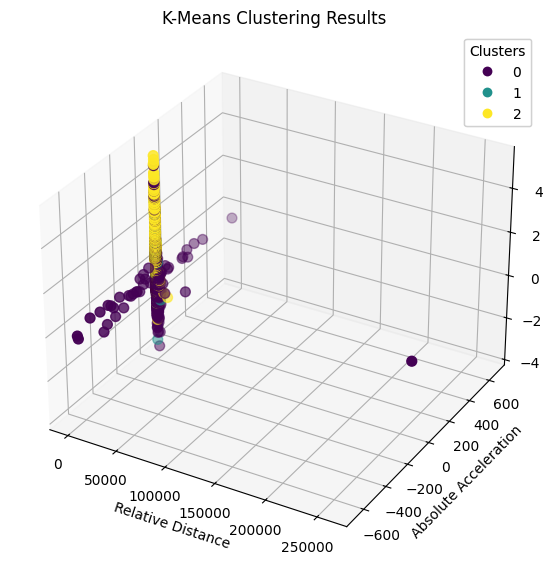

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np



def normalize_data(features):
    """
    Normalize the given feature dataframe using StandardScaler.
    
    Args:
    - features (pd.DataFrame): The dataframe to normalize.
    
    Returns:
    - np.array: The normalized data.
    """
    features.dropna(inplace=True)
    scaler = StandardScaler()
    return scaler.fit_transform(features.drop(['case_id'], axis=1))

def perform_kmeans_clustering(data, n_clusters=3):
    """
    Perform KMeans clustering on the data.
    
    Args:
    - data (np.array): The data to cluster.
    - n_clusters (int, optional): Number of clusters. Default is 3.
    
    Returns:
    - np.array: The cluster labels.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    return kmeans.fit_predict(data)

def plot_kmeans_results(features, labels):
    """
    Plot the results of the KMeans clustering.
    
    Args:
    - features (pd.DataFrame): The feature dataframe.
    - labels (np.array): The cluster labels.
    """
    fig = plt.figure(figsize=(15, 7))

    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(features['TTC'], 
                           features['time_headway'], 
                           features['delta_velocity'], 
                           c=labels, 
                           cmap='viridis', 
                           s=50)

    ax1.set_xlabel('Relative Distance')
    ax1.set_ylabel('Absolute Acceleration')
    ax1.set_zlabel('Relative Velocity')
    ax1.set_title('K-Means Clustering Results')
    legend1 = ax1.legend(*scatter1.legend_elements(), title="Clusters")
    ax1.add_artist(legend1)
    plt.show()

# Usage
scaled_data = normalize_data(selected_features)
selected_features['cluster'] = perform_kmeans_clustering(scaled_data)
plot_kmeans_results(selected_features, selected_features['cluster'])


c:\Users\zhang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\zhang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\zhang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\zhang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

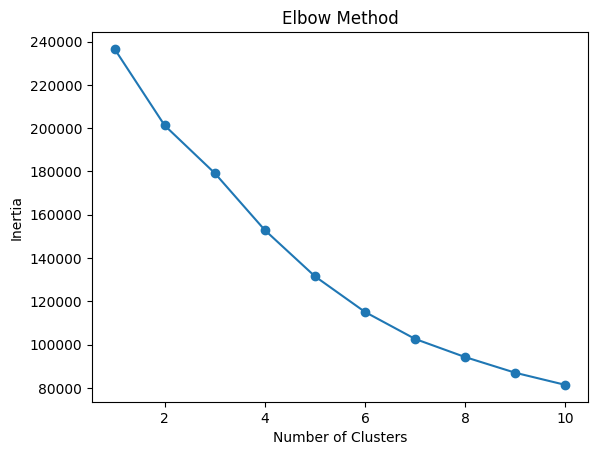

c:\Users\zhang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


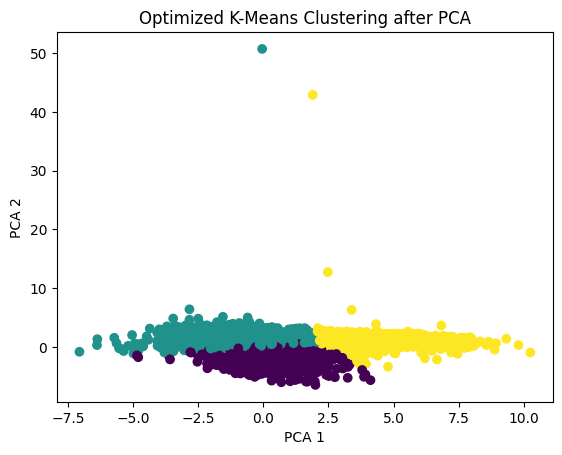

The average silhouette_score is: 0.38771479761364597


In [5]:
selected_features = trainHA
#print selected_features length
print(len(selected_features))





In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import math

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)
    
    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions


clustered_dataframes = {}
for cluster_number in clustered_data['cluster'].unique():
    clustered_dataframes[cluster_number] = clustered_data[clustered_data['cluster'] == cluster_number].drop(columns=['cluster', 'case_id'])

def preprocess_data(df, n_steps_in, n_steps_out, test_size=0.2):
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(df)
    X, y = create_sequences(data_normalized, n_steps_in, n_steps_out)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return (
        torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32),
        torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32),
        scaler
    )

def create_sequences(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(data):
            break
        seq_x, seq_y = data[i:end_ix, :], data[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

def train_model(model, X_train_tensor, y_train_tensor, epochs, optimizer, loss_function):
    for epoch in tqdm(range(epochs), desc='Training Epochs'):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train_tensor)
        loss = loss_function(y_pred, y_train_tensor[:, 0, :])
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            tqdm.write(f'Epoch: {epoch} Loss: {loss.item():.4f}')

def evaluate_model(model, X_test_tensor, y_test_tensor, scaler):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        y_pred = y_pred.cpu().numpy()
        y_pred_original = scaler.inverse_transform(y_pred)
        y_test_original = scaler.inverse_transform(y_test_tensor.cpu().numpy()[:, 0, :])
        mse = mean_squared_error(y_test_original, y_pred_original)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(y_test_original, y_pred_original)
    print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}')
    return mse, rmse, mae

models_scalers = {}
n_steps_in, n_steps_out = 3, 1
for cluster, cluster_df in clustered_dataframes.items():
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, scaler = preprocess_data(cluster_df, n_steps_in, n_steps_out)
    model = LSTMModel(input_size=X_train_tensor.shape[2], hidden_layer_size=50, output_size=y_train_tensor.shape[2])
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_function = nn.MSELoss()
    train_model(model, X_train_tensor, y_train_tensor, epochs=100, optimizer=optimizer, loss_function=loss_function)
    mse, rmse, mae = evaluate_model(model, X_test_tensor, y_test_tensor, scaler)
    models_scalers[cluster] = {'model': model, 'scaler': scaler, 'metrics': (mse, rmse, mae)}

# Save the model and scaler if needed
torch.save(models_scalers, 'models_scalers.pth')


  3%|▎         | 3/100 [00:00<00:07, 12.83it/s]

epoch: 0 loss: 0.49184984


 13%|█▎        | 13/100 [00:00<00:04, 17.71it/s]

epoch: 10 loss: 0.37886670


 25%|██▌       | 25/100 [00:01<00:04, 18.53it/s]

epoch: 20 loss: 0.25835168


Training Epochs:  32%|███▏      | 32/100 [00:02<00:06, 11.32it/s]

epoch: 30 loss: 0.12135606


 43%|████▎     | 43/100 [00:02<00:03, 18.08it/s]

epoch: 40 loss: 0.01635828


 53%|█████▎    | 53/100 [00:02<00:02, 18.81it/s]

epoch: 50 loss: 0.01880449


 63%|██████▎   | 63/100 [00:03<00:01, 18.78it/s]

epoch: 60 loss: 0.00910891


 75%|███████▌  | 75/100 [00:04<00:01, 18.83it/s]

epoch: 70 loss: 0.00921072


 85%|████████▌ | 85/100 [00:04<00:00, 18.75it/s]

epoch: 80 loss: 0.00829466


 93%|█████████▎| 93/100 [00:05<00:00, 19.48it/s]

epoch: 90 loss: 0.00814588


100%|██████████| 100/100 [00:05<00:00, 18.12it/s]


Mean Squared Error (MSE): 0.57
Root Mean Squared Error (RMSE): 0.76
Mean Absolute Error (MAE): 0.54


  3%|▎         | 3/100 [00:00<00:03, 25.45it/s]

epoch: 0 loss: 0.26303762


 15%|█▌        | 15/100 [00:00<00:03, 27.64it/s]

epoch: 10 loss: 0.19429857


 24%|██▍       | 24/100 [00:00<00:02, 26.02it/s]

epoch: 20 loss: 0.12422454


 36%|███▌      | 36/100 [00:01<00:02, 27.52it/s]

epoch: 30 loss: 0.05124555


 45%|████▌     | 45/100 [00:01<00:02, 26.97it/s]

epoch: 40 loss: 0.00543044


 54%|█████▍    | 54/100 [00:02<00:01, 26.76it/s]

epoch: 50 loss: 0.00998564


 66%|██████▌   | 66/100 [00:02<00:01, 27.41it/s]

epoch: 60 loss: 0.00432211


 75%|███████▌  | 75/100 [00:02<00:00, 25.89it/s]

epoch: 70 loss: 0.00483109


 84%|████████▍ | 84/100 [00:03<00:00, 25.57it/s]

epoch: 80 loss: 0.00423230


 96%|█████████▌| 96/100 [00:03<00:00, 26.59it/s]

epoch: 90 loss: 0.00424132


100%|██████████| 100/100 [00:03<00:00, 26.59it/s]


Mean Squared Error (MSE): 0.63
Root Mean Squared Error (RMSE): 0.79
Mean Absolute Error (MAE): 0.61


 16%|█▌        | 16/100 [00:00<00:00, 156.55it/s]

epoch: 0 loss: 0.05946311
epoch: 10 loss: 0.03647152
epoch: 20 loss: 0.02422940


 48%|████▊     | 48/100 [00:00<00:00, 138.74it/s]

epoch: 30 loss: 0.02013387
epoch: 40 loss: 0.02052322
epoch: 50 loss: 0.02018879


 78%|███████▊  | 78/100 [00:00<00:00, 143.43it/s]

epoch: 60 loss: 0.02008117
epoch: 70 loss: 0.02009696
epoch: 80 loss: 0.02006897


100%|██████████| 100/100 [00:00<00:00, 144.79it/s]

epoch: 90 loss: 0.02006951
Mean Squared Error (MSE): 1.79
Root Mean Squared Error (RMSE): 1.34
Mean Absolute Error (MAE): 1.05


In [103]:
# Evaluation dataset is used here to predict the next time step
eval_df = convert_df("HA", "val")


In [31]:
input_data = np.array([[20, 3],   # 时间步1：速度=20m/s，加速度=3m/s^2
                       [22, 2],   # 时间步2：速度=22m/s，加速度=2m/s^2
                       [24, 2.5], # 时间步3：速度=24m/s，加速度=2.5m/s^2
                       [25, 1.5], # 时间步4：速度=25m/s，加速度=1.5m/s^2
                       [26, 1]])  # 时间步5：速度=26m/s，加速度=1m/s^2

input_tensor = torch.tensor(input_data, dtype=torch.float32)

with torch.no_grad():
    model.eval()  # 设置模型为评估模式
    output = model(input_tensor.unsqueeze(0))

output_array = output.numpy()

predicted_positions = [output_array[0, 0] for timestep in range(output_array.shape[1])]


for timestep, position in enumerate(predicted_positions, start=1):
    print(f"时间步 {timestep} 的预测车辆位置为：{position} 米")

时间步 1 的预测车辆位置为：0.41017335653305054 米
时间步 2 的预测车辆位置为：0.41017335653305054 米


In [ ]:
# this is the initial input for the model, the minimum sequence length is 3 so at least 3 rows are needed
eval_df = eval_df.head(3)
eval_df = eval_df.drop(columns=['case_id'])

eval_df


,delta_velocity,v_follower,delta_acceleration,a_follower,jerk_follower,time_headway,delta_position,TTC,TTC_min
0,-0.112306,13.972906,-0.040953,0.913186,0.013031,2.296439,22.095424,124.803687,11.794680
1,1.577983,12.061164,-0.035401,0.162992,0.013574,3.225179,8.866747,18.864220,3.197740
2,-0.274519,12.536280,-0.004253,3.739273,-0.047253,1.156909,9.121510,85.516191,7.427292


In [106]:
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def predict_delta_acceleration(eval_df, models_scalers, cluster_number=1, n_steps_in=3, delta_acceleration_index=2):
    """
    Predicts the delta acceleration of a car using an LSTM model trained on car-following data.

    Parameters:
    eval_df (pandas.DataFrame): The input data to predict on.
    models_scalers (dict): A dictionary containing the trained models and scalers for each cluster.
    cluster_number (int): The cluster number to use for prediction.
    n_steps_in (int): The number of time steps to use as input for the LSTM model.
    delta_acceleration_index (int): The index of the delta acceleration column in the output.

    Returns:
    float: The predicted delta acceleration.
    """
    

    # Load the scaler for the cluster
    scaler = models_scalers[cluster_number]['scaler']

    # Prepare the input data for prediction
    X_new_prepared = preprocess_new_data(eval_df.values, scaler, n_steps_in)
    X_new_tensor = torch.tensor(X_new_prepared, dtype=torch.float32)

    # Load the model for the cluster
    model = models_scalers[cluster_number]['model']

    # Predict using the model
    model.eval()
    with torch.no_grad():
        y_new_pred_tensor = model(X_new_tensor)
        y_new_pred = y_new_pred_tensor.numpy()

    # Inverse transform the predictions to the original scale
    y_new_pred_original = scaler.inverse_transform(y_new_pred)

    # Extract the denormalized delta_acceleration values
    delta_acceleration_pred_original = y_new_pred_original[:, delta_acceleration_index]

    # Return the predicted delta acceleration
    return delta_acceleration_pred_original

# Load the model from the saved models_cales.pth file
models_scalers = torch.load('models_scalers.pth')

# Predict the delta acceleration for the eval_df dataframe
cluster_number = 1
delta_acceleration_pred = predict_delta_acceleration(eval_df, models_scalers, cluster_number)
delta_acceleration_pred

/Users/ykong/.local/share/virtualenvs/car-following-project--ZycwsGt/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.00502765], dtype=float32)